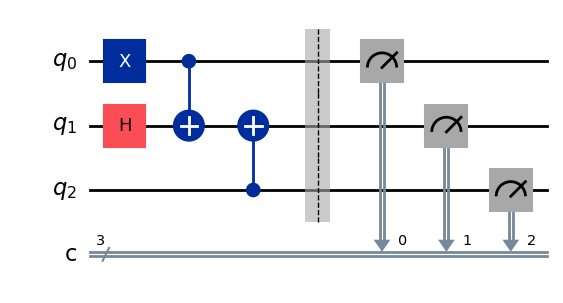

In [1]:
from qiskit import QuantumCircuit
qc=QuantumCircuit(3,3) # Initialize a circuit with 3 qubits and 2 classical bits
qc.x(0) #Add PauliX gate to qubit 0
qc.h(1) #Add Hadamard gate to qubit 1
qc.cx(0,1) #Add a CNOT gate to qubit 0,1 controlled by qubit 0
qc.cx(2,1) #Add a CNOT gate to qubit 2,1 controlled by qubit 2
qc.barrier()
qc.measure([0,1,2],[0,1,2]) # Add measurement on the computational basis.
qc.draw("mpl")

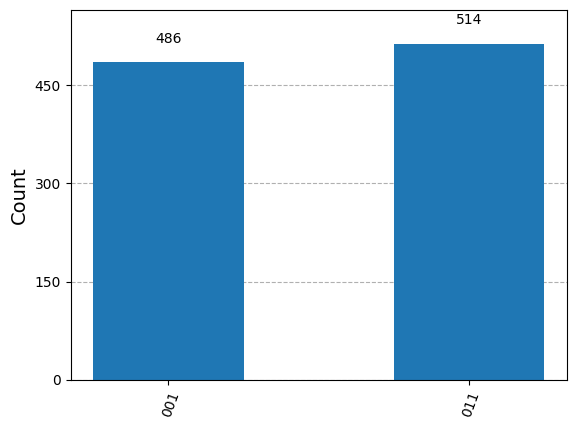

In [2]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
backend = AerSimulator()
job = backend.run(qc, shots=1000) # Run the circuit 1000 times 
output = job.result().get_counts() 
plot_histogram(output) #Plot the result

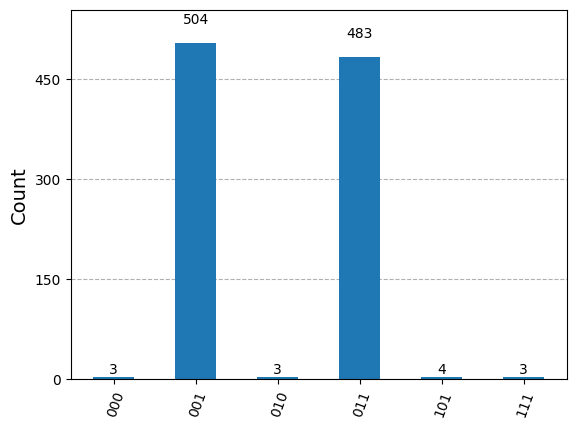

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.visualization import plot_histogram
 
# Generate a 20-qubit simulated backend
backend = GenericBackendV2(num_qubits=20)
 

qc=QuantumCircuit(3,3) # Initialize a circuit with 3 qubits and 2 classical bits
qc.x(0) #Add PauliX gate to qubit 0
qc.h(1) #Add Hadamard gate to qubit 1
qc.cx(0,1) #Add a CNOT gate to qubit 0,1 controlled by qubit 0
qc.cx(2,1) #Add a CNOT gate to qubit 2,1 controlled by qubit 2
qc.barrier()
qc.measure([0,1,2],[0,1,2]) # Add measurement on the computational basis.
 
# Transpile the ideal circuit to a circuit that can be directly executed by the backend
transpiled_circuit = transpile(qc, backend)
transpiled_circuit.draw('mpl')
 
# Run the transpiled circuit using the simulated backend
job = backend.run(transpiled_circuit,shots=1000)
counts = job.result().get_counts()
plot_histogram(counts)

In [6]:
from noisemodel import construct_bitphaseflip_noise_model

In [12]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
backend = AerSimulator()
noise_model=construct_bitphaseflip_noise_model(0.1,0.1,0.1)
job = backend.run(qc, shots=1000,noise_model=noise_model) # Run the circuit 1000 times 
output = job.result().get_counts() 
plot_histogram(output,filename="Figure/noisemodelexample.png") #Plot the result

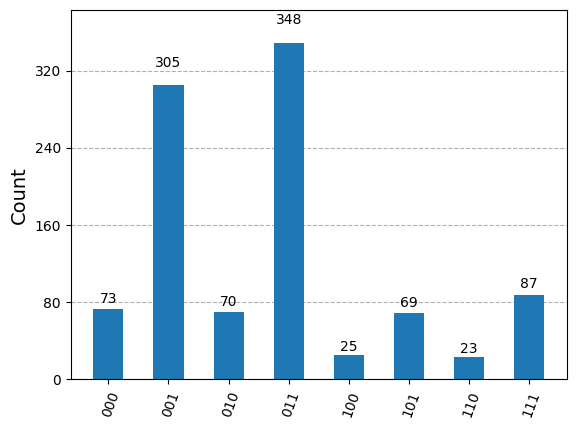

In [9]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
backend = AerSimulator()
noise_model=construct_bitphaseflip_noise_model(0.2,0.2,0.2)
job = backend.run(qc, shots=1000,noise_model=noise_model) # Run the circuit 1000 times 
output = job.result().get_counts() 
plot_histogram(output) #Plot the result

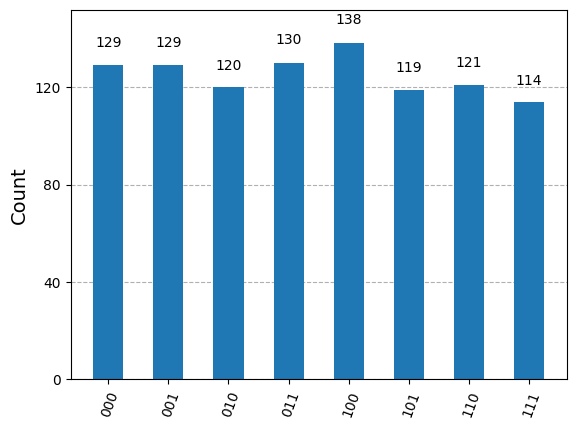

In [10]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
backend = AerSimulator()
noise_model=construct_bitphaseflip_noise_model(0.5,0.5,0.5)
job = backend.run(qc, shots=1000,noise_model=noise_model) # Run the circuit 1000 times 
output = job.result().get_counts() 
plot_histogram(output) #Plot the result